In [26]:
#Equipo 3
#Lider/Supervisor: Emilio Gallegos A01066813
#Participante: Josemaria Robledo Lara A01612376


#Se importan las bibliotecas necesarias.
import os
from scipy import signal, misc
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import io 

In [27]:
#Se crea matriz de 4x4 y un kernel de 2x2
Matriz = np.array([[1,1,1,1], [1,1,1,1], [0,0,0,0], [0,0,0,0]])
Kernel = np.array([[1,1], [-1,-1]])
Matriz

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [28]:
#Se hace una operacion de convolucion entre la matriz de 4x4 y el kernel de 2x2

#Se llama la función de convolución y se pasa la matriz de entrada.
#Funcion de la libreria de scipy 
temp = signal.convolve2d(Matriz, Kernel, mode='same')   #Gracias al same se mantienen las dimensiones de la imagen de entrada 
temp

array([[ 1,  2,  2,  2],
       [ 0,  0,  0,  0],
       [-1, -2, -2, -2],
       [ 0,  0,  0,  0]])

In [29]:
#Función de la convolución para el filtrado de imágenes
def show_convolve2d(imagen, kernel):
    
    %matplotlib notebook
    plt.ion()
    
    imagen_list = []
    for d in range(3): #El 3 representa cada canal de la imagen.
        temp = signal.convolve2d(imagen[:,:,d] , kernel,  boundary='symm',mode='same') #Imagen del mismo tamaño 
        imagen_list.append(temp)

    imagen_filt = np.stack(imagen_list, axis=2)
    imagen_filt[imagen_filt > 255] = 255
    imagen_filt[imagen_filt < 0] = 0
    imagen_filt = imagen_filt.astype("uint8")

    plt.subplot(1,2,1)
    io.imshow(imagen_filt) #Se muestra la imagen con el filtro ya aplicado.
    plt.axis('off')

    plt.subplot(1,2,2)
    io.imshow(imagen) #Se muestra la imagen original para futuras comparaciones.
    plt.axis('off')

    io.show()

In [30]:
#Se carga una imagen de prueba del directorio con dimensiones pequeñas
filename = os.path.join('repoEQ3/','prueba.jpg') 
#Se lee la carpeta que contiene la imagen prueba
imagen = io.imread(filename)

<IPython.core.display.Javascript object>


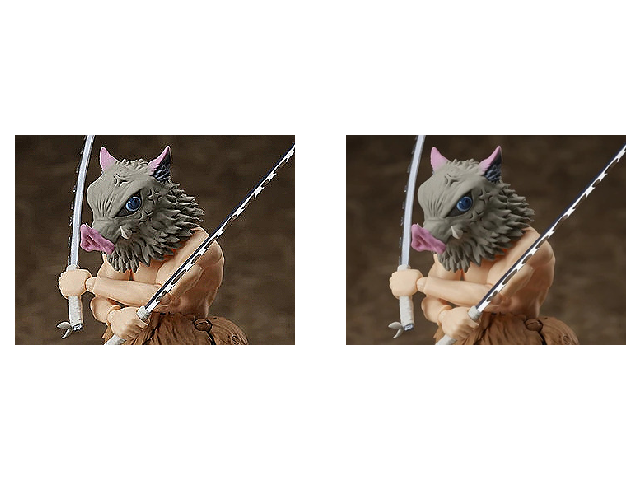

In [17]:
#Filtro de Enfoque
k=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
show_convolve2d(imagen,k)
#Se imprime

<IPython.core.display.Javascript object>


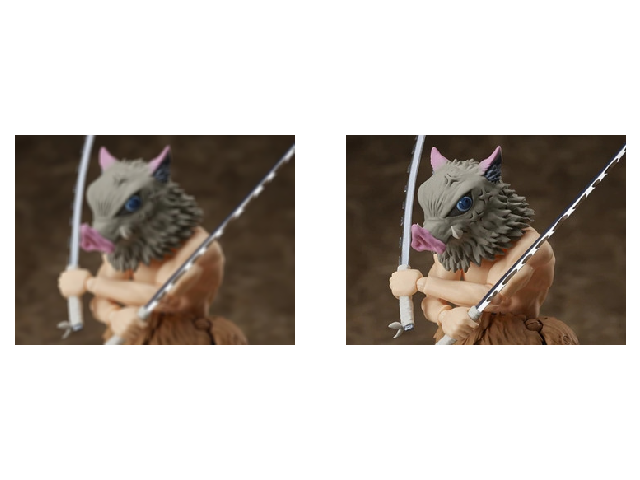

In [19]:
#Filtro de Desenfoque o Filtro de Media
tam = 5
k = np.ones((tam,tam))/(tam**2)
show_convolve2d(imagen,k)

<IPython.core.display.Javascript object>


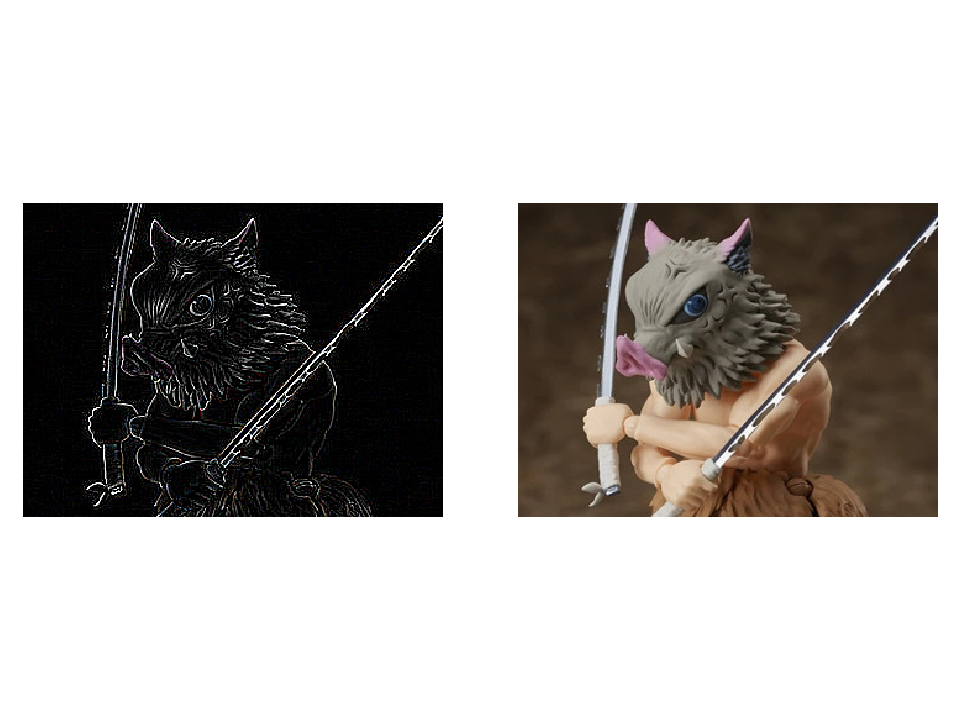

In [25]:
#Filtro de detección de bordes
k=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
show_convolve2d(imagen ,k)

<IPython.core.display.Javascript object>


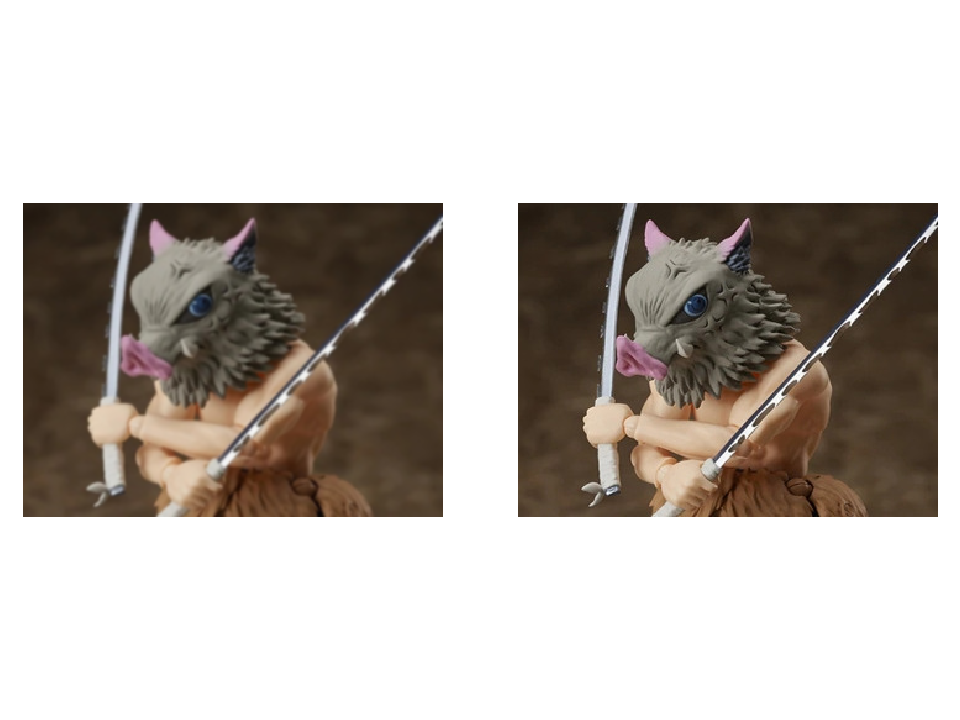

In [33]:
#Filtro de suavizado gaussiano
tam=5
k = signal.gaussian(tam, 1).reshape(-1, 1)@signal.gaussian(tam, 1).reshape(1, -1)
k=k/np.sum(k)
show_convolve2d(imagen ,k)